##### Selecionando apenas as colunas que nos interessam:

In [1]:
#Importando Pacote Pandas
import pandas as pd

#Importando Base de Dados
microdadosEnem = pd.read_csv("microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1') 

##### Criarmos um novo Dataframe apenas com os dados que serão analisados:

In [28]:
colunaSelecionadas = ['NU_INSCRICAO',
                      'NU_NOTA_MT','NU_NOTA_REDACAO',
                      'Q001','Q002','SG_UF_ESC']

##### Visualizar a cabeça (head) do Dataframe:

In [29]:
microdadosEnemSelecionados = microdadosEnem.filter(items=colunaSelecionadas)

In [30]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC
0,190001595656,NaN,NaN,B,B,NaN
1,190001421546,NaN,NaN,C,E,NaN
2,190001133210,NaN,NaN,E,E,NaN
3,190001199383,392.0,460.0,C,E,NaN
4,190001237802,677.0,860.0,E,E,NaN


##### O que é esse tal de NaN?
NaN: significa Not a Number, que quer dizer que não é um número.

In [31]:
microdadosEnemSelecionados = microdadosEnemSelecionados.dropna()

In [32]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC
26,190001867757,713.7,900.0,E,E,PR
28,190001692704,394.1,580.0,E,B,RS
31,190001595660,442.0,660.0,E,F,SP
34,190001421552,704.5,620.0,E,C,BA
53,190001480443,379.1,480.0,D,E,PB


#### Finalmente: O questionário de indicadores socioeconômicos!
Começaremos pelas duas primeiras questões:

    Q001: Até que série seu pai, ou o homem responsável por você, estudou?
    Q002: Até que série sua mãe, ou a mulher responsável por você, estudou?

##### Passo 1 - Definirmos um dicionário:
  Faremos isso para visualizar melhor o resultado

In [33]:
dicionarioQuestao = {
  'A' :	'Nunca estudou.',
  'B'	: 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
  'C'	: 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
  'D'	: 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
  'E'	: 'Completou o Ensino Médio, mas não completou a Faculdade.',
  'F'	: 'Completou a Faculdade, mas não completou a Pós-graduação.',
  'G'	: 'Completou a Pós-graduação.',
  'H'	: 'Não sei.'
}

In [34]:
microdadosEnemSelecionados.filter(items=['Q001', 'NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,36236
B,159365
C,139436
D,126700
E,275946
F,77373
G,47010
H,91821


##### Passo 2 - Criar novas colunas no Dataframe:
Inserir coluna NO_Q001 e NO_Q002:

In [35]:
microdadosEnemSelecionados['NO_Q001'] = [dicionarioQuestao[resp] for resp in microdadosEnemSelecionados.Q001]

In [36]:
microdadosEnemSelecionados['NO_Q002'] = [dicionarioQuestao[resp] for resp in microdadosEnemSelecionados.Q002]

In [37]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,NO_Q001,NO_Q002
26,190001867757,713.7,900.0,E,E,PR,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
28,190001692704,394.1,580.0,E,B,RS,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
31,190001595660,442.0,660.0,E,F,SP,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós..."
34,190001421552,704.5,620.0,E,C,BA,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou..."
53,190001480443,379.1,480.0,D,E,PB,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."


##### Passo 3 - Comparando a distribuição do nível de escolaridade PaixMãe no conjunto de dados
Utilizando os métodos do Dataframe filter(), groupby(), count(), sort_values()

documentação disponível em:

1 - Distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [38]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q001']).groupby('NO_Q001').count().sort_values('NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade.",275946
Não completou a 4ª série/5º ano do Ensino Fundamental.,159365
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",139436
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",126700
Não sei.,91821
"Completou a Faculdade, mas não completou a Pós-graduação.",77373
Completou a Pós-graduação.,47010
Nunca estudou.,36236


2 - Distribuição dos candidatos do ENEM 2018 por escolaridade do Mãe

In [39]:
microdadosEnemSelecionados.filter(items=['NU_INSCRICAO', 'NO_Q002']).groupby('NO_Q002').count().sort_values('NU_INSCRICAO', ascending = False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade.",338885
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",139648
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",124236
Não completou a 4ª série/5º ano do Ensino Fundamental.,109972
"Completou a Faculdade, mas não completou a Pós-graduação.",106363
Completou a Pós-graduação.,80124
Não sei.,34294
Nunca estudou.,20365


##### Passo 4 - Olhando o desempenho em matemática segundo a escolaridade PaixMãe

1 - Por escolaridade do Pai

In [40]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending= False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação.,636.382621
"Completou a Faculdade, mas não completou a Pós-graduação.",604.842012
"Completou o Ensino Médio, mas não completou a Faculdade.",537.855065
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",513.314038
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",503.269795
Não sei.,491.842290
Não completou a 4ª série/5º ano do Ensino Fundamental.,486.662127
Nunca estudou.,467.467449


2 - Por escolaridade do Mãe

In [41]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending= False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação.,606.987630
"Completou a Faculdade, mas não completou a Pós-graduação.",587.145851
"Completou o Ensino Médio, mas não completou a Faculdade.",527.635202
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",503.024227
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",493.042966
Não sei.,481.358200
Não completou a 4ª série/5º ano do Ensino Fundamental.,479.283592
Nunca estudou.,461.284351


##### Passo 5 - Olhando o desempenho em redação segundo a escolaridade PaixMãe

1 - Por escolaridade do Pai

In [42]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)

,NU_NOTA_REDACAO
NO_Q001,
Completou a Pós-graduação.,723.324825
"Completou a Faculdade, mas não completou a Pós-graduação.",687.511923
"Completou o Ensino Médio, mas não completou a Faculdade.",608.706196
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",573.561484
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",558.206202
Não completou a 4ª série/5º ano do Ensino Fundamental.,531.147366
Não sei.,526.011479
Nunca estudou.,490.177724


In [43]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,693.700265
"Completou a Faculdade, mas não completou a Pós-graduação.",668.427367
"Completou o Ensino Médio, mas não completou a Faculdade.",594.892191
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",557.189935
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",539.263499
Não completou a 4ª série/5º ano do Ensino Fundamental.,516.638053
Não sei.,490.878288
Nunca estudou.,473.638105


In [44]:
q002redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)
q001redacao = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_REDACAO', ascending= False)
q002matematica = microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending= False)
q001matematica = microdadosEnemSelecionados.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending= False)

<AxesSubplot:xlabel='NO_Q001'>

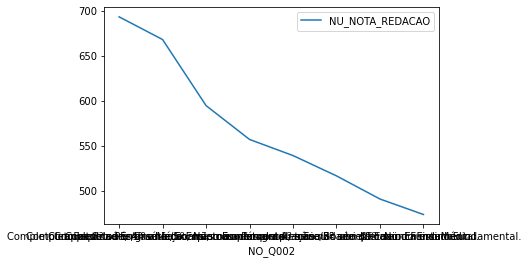

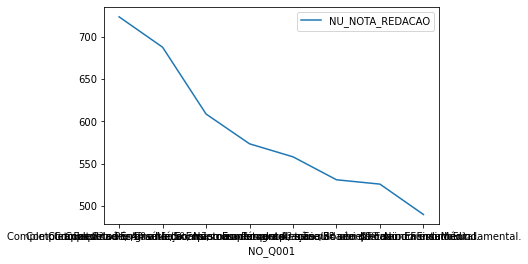

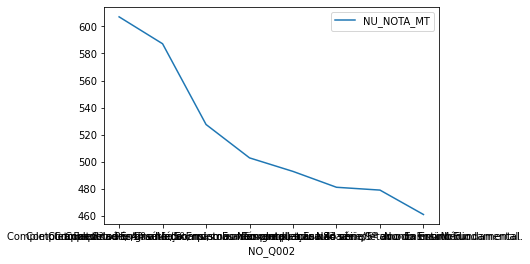

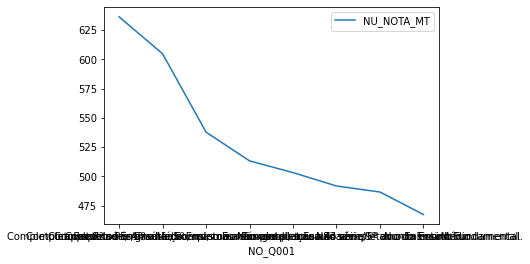

In [45]:
q002redacao.plot()
q001redacao.plot()
q002matematica.plot()
q001matematica.plot()

In [46]:
describeQ001 = microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

In [47]:
describeQ001

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4ª série/5º ano, mas não completou ...        139436.0   
Completou a 8ª série/9º ano do Ensino Fundament...        126700.0   
Completou a Faculdade, mas não completou a Pós-...         77373.0   
Completou a Pós-graduação.                                 47010.0   
Completou o Ensino Médio, mas não completou a F...        275946.0   
Nunca estudou.                                             36236.0   
Não completou a 4ª série/5º ano do Ensino Funda...        159365.0   
Não sei.                                                   91821.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4ª série/5º ano, mas não completou ...  558.206202  183.485280   
Completou a 8ª série/9º ano do Ensino Fundament...  573.561484  180.550371   
Completou a Faculdade, mas não completou a Pós-...  687.511923  170.354081   
Completou a Pós-graduação.                          723.324825  168.028280   
Completou o Ensino Médio, mas não completou a F...  608.706196  176.526191   
Nunca estudou.                                      490.177724  203.042516   
Não completou a 4ª série/5º ano do Ensino Funda...  531.147366  188.308366   
Não sei.                                            526.011479  195.141080   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4ª série/5º ano, mas não completou ...  0.0  480.0  580.0  660.0   
Completou a 8ª série/9º ano do Ensino Fundament...  0.0  480.0  580.0  680.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  680.0  820.0   
Completou a Pós-graduação.                          0.0  620.0  740.0  860.0   
Completou o Ensino Médio, mas não completou a F...  0.0  520.0  600.0  720.0   
Nunca estudou.                                      0.0  400.0  520.0  600.0   
Não completou a 4ª série/5º ano do Ensino Funda...  0.0  440.0  560.0  640.0   
Não sei.                                            0.0  440.0  560.0  640.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4ª série/5º ano, mas não completou ...   980.0  
Completou a 8ª série/9º ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação.                          1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou.                                       980.0  
Não completou a 4ª série/5º ano do Ensino Funda...   980.0  
Não sei.                                            1000.0

In [48]:
microdadosEnemSelecionados.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,SG_UF_ESC,NO_Q001,NO_Q002
26,190001867757,713.7,900.0,E,E,PR,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
28,190001692704,394.1,580.0,E,B,RS,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
31,190001595660,442.0,660.0,E,F,SP,"Completou o Ensino Médio, mas não completou a ...","Completou a Faculdade, mas não completou a Pós..."
34,190001421552,704.5,620.0,E,C,BA,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou..."
53,190001480443,379.1,480.0,D,E,PB,Completou a 8ª série/9º ano do Ensino Fundamen...,"Completou o Ensino Médio, mas não completou a ..."


### Nota da redação, pelo grau de instrução materno e filtrando por estado!

In [49]:
microdadosEnemSelecionados.filter(items=['NU_NOTA_REDACAO', 'NO_Q002'])\
                          .where(cond=microdadosEnemSelecionados.SG_UF_ESC == 'SC')\
                          .groupby('NO_Q002')\
                          .mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)

,NU_NOTA_REDACAO
NO_Q002,
Completou a Pós-graduação.,663.875034
"Completou a Faculdade, mas não completou a Pós-graduação.",649.292149
"Completou o Ensino Médio, mas não completou a Faculdade.",600.012446
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",574.604333
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",561.818182
Não completou a 4ª série/5º ano do Ensino Fundamental.,548.566446
Não sei.,541.070664
Nunca estudou.,518.039216


In [50]:
microdadosEnemSelecionados.filter(items=['SG_UF_ESC','NU_NOTA_REDACAO', 'NO_Q002'])\
                          .groupby(['SG_UF_ESC','NO_Q002'])\
                          .mean()

NU_NOTA_REDACAO
SG_UF_ESC NO_Q002                                                            
AC        Completou a 4ª série/5º ano, mas não completou ...       530.618762
          Completou a 8ª série/9º ano do Ensino Fundament...       550.653266
          Completou a Faculdade, mas não completou a Pós-...       636.618182
          Completou a Pós-graduação.                               679.726651
          Completou o Ensino Médio, mas não completou a F...       578.679505
...                                                                       ...
TO        Completou a Pós-graduação.                               653.716578
          Completou o Ensino Médio, mas não completou a F...       572.685635
          Nunca estudou.                                           479.200000
          Não completou a 4ª série/5º ano do Ensino Funda...       489.115152
          Não sei.                                                 495.460993

[216 rows x 1 columns]

In [51]:
import matplotlib.pyplot as plt

Text(0.02, 0.65, 'A : Nunca estudou.\nB : Não completou a 4ª série/5º ano do Ensino Fundamental.\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\nE : Completou o Ensino Médio, mas não completou a Faculdade.\nF : Completou a Faculdade, mas não completou a Pós-graduação.\nG : Completou a Pós-graduação.\nH : Não sei.\n')

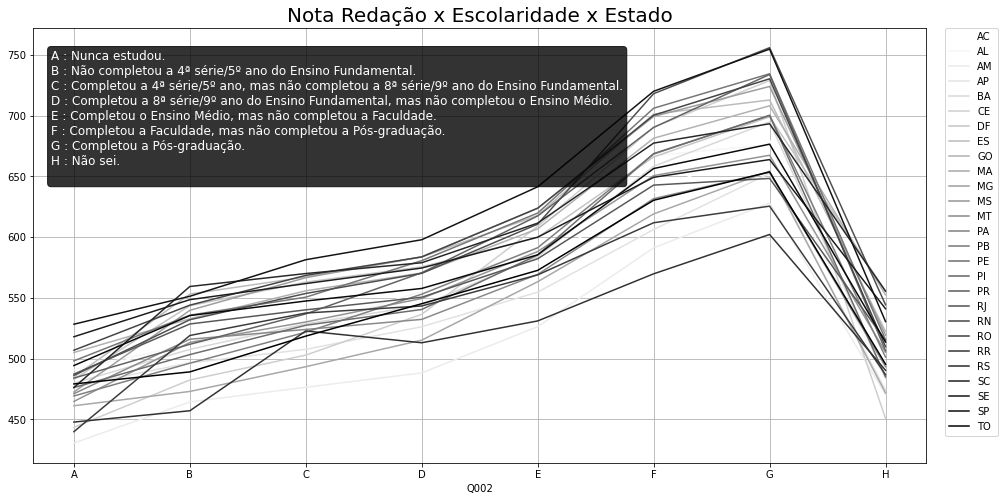

In [70]:
#fig, ax = plt.subplots(figsize=(16,10))
#plt.suptitle('Nota redação x Escolaridade x Estado')
 
ax = microdadosEnemSelecionados.filter(items=['SG_UF_ESC','Q002','NU_NOTA_REDACAO'])\
                          .groupby(['Q002','SG_UF_ESC'])\
                          .mean().sort_values(by='NU_NOTA_REDACAO', ascending = False)\
                          .unstack().plot(figsize=(16,8), colormap='purple', grid=True)
ax.set_title('Nota Redação x Escolaridade x Estado', fontsize=20)
# ax.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()

import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.08, 1), loc=0, borderaxespad=0.)

textdictQ002 = ""
for key,value in dicionarioQuestao.items():
            textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key,v=value)
# print(textdictQ002)

ax.text(0.02,0.65, textdictQ002, transform=ax.transAxes, fontsize=12, color = 'white',
        bbox={'boxstyle' : 'round', 'facecolor' : 'black', 'alpha' : 0.8})